In [13]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset

import torch
import matplotlib.pyplot as plt

In [2]:
dataset = WearSEDDataset(preprocess=True)

x, label = dataset[1]

In [3]:
print(x.shape, label.shape)

torch.Size([6, 30399]) torch.Size([30399])


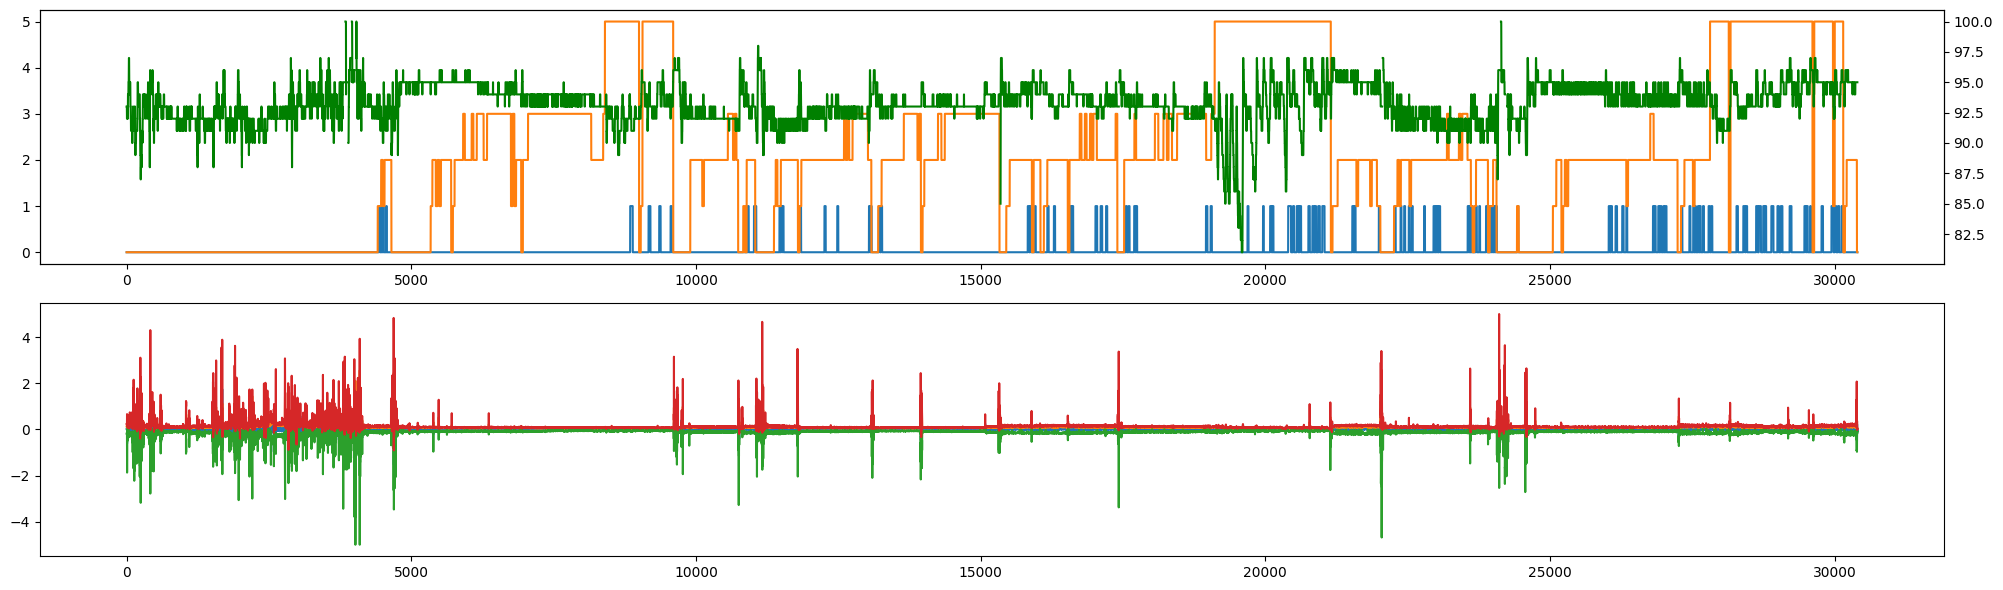

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(20, 2*3))

axs[0].plot(label)
axs[0].plot(x[0])
axs[1].plot(x[2])
axs[1].plot(x[3])
axs[1].plot(x[4])
axs[1].plot(x[5])

ax0twin = axs[0].twinx()
ax0twin.plot(x[1], color='green')

plt.tight_layout()
plt.show()

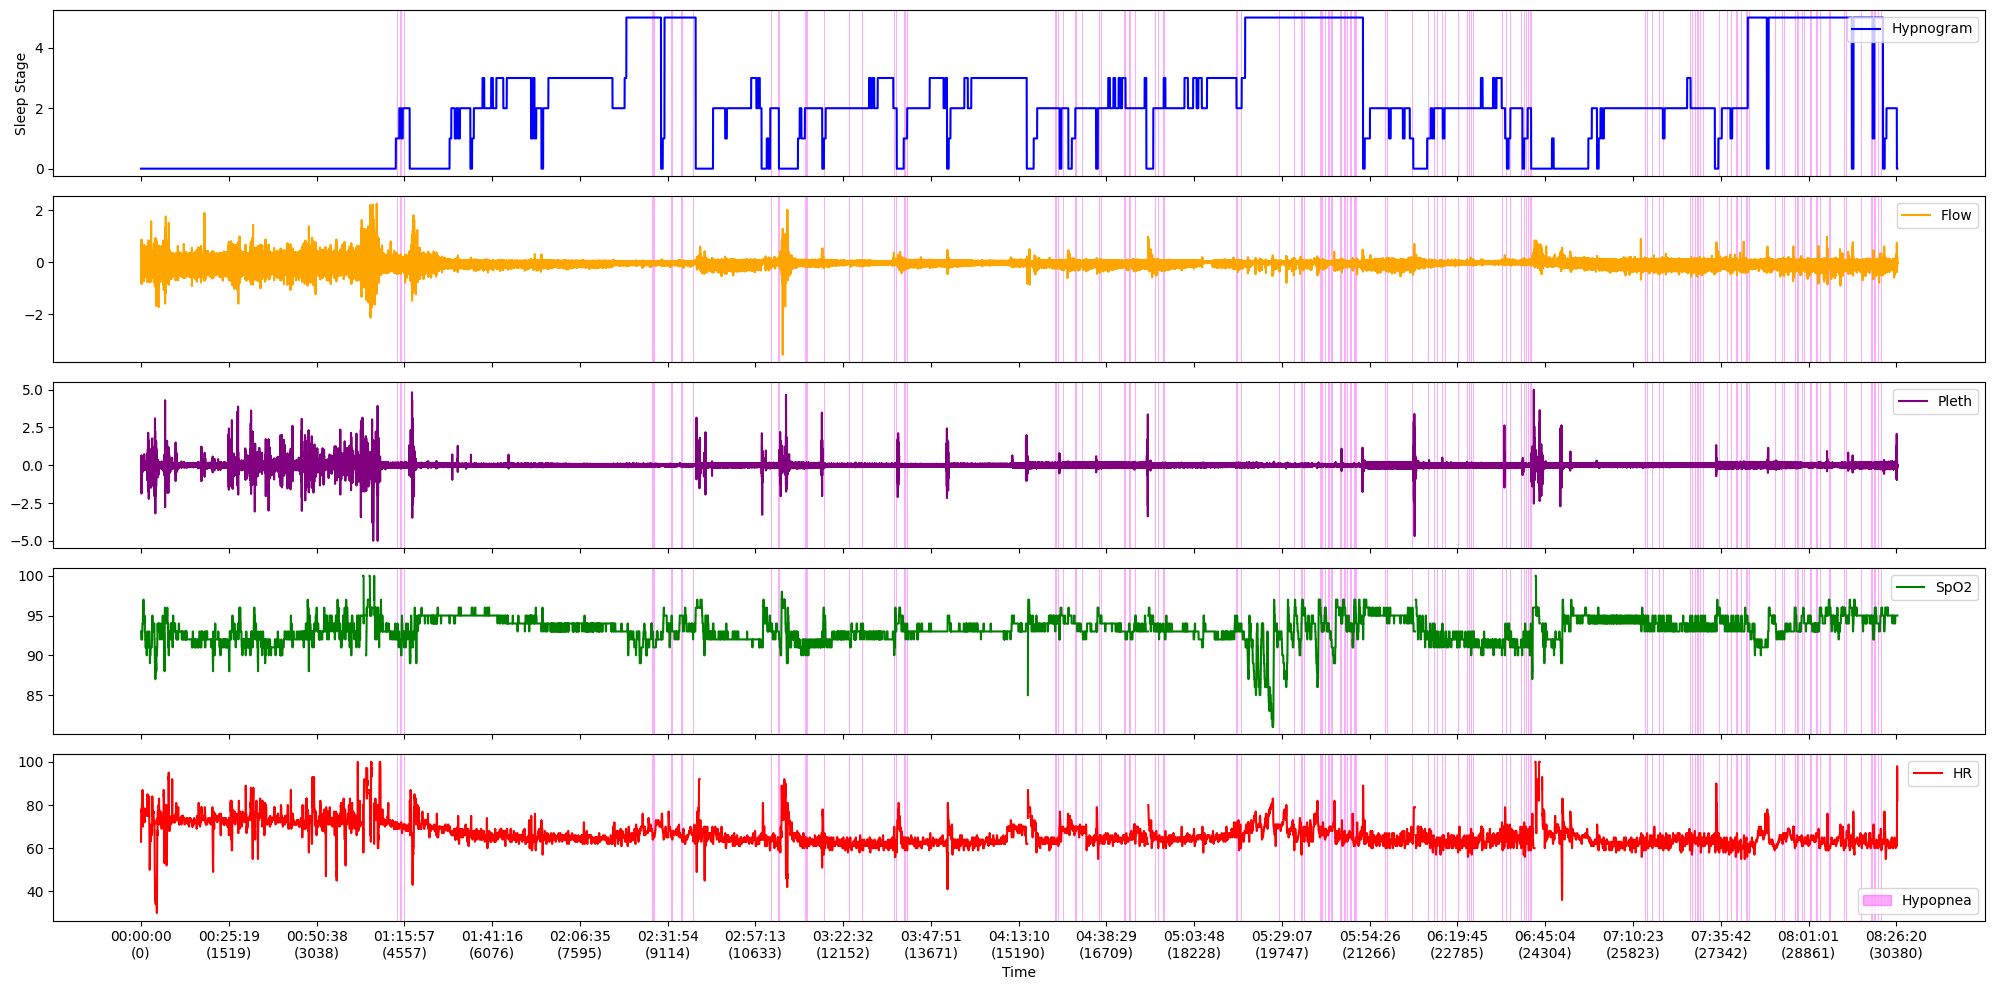

In [5]:
rec_dataset = WearSEDDataset()

r1 = rec_dataset[1]
r1.look_at(events=['Hypopnea', 'Obstructive apnea'])

### Test the batch method for training

In [21]:
def get_random_sequence(signals, labels, max_time, seq_length):
    start = torch.randint(0, max_time, (1,))
    end = start + seq_length
    return signals[:, start:end], labels[start:end]

def get_batch(signals, labels, batch_size, seq_length): # TODO
    max_time = signals.shape[1] - seq_length

    tries = 0
    batch_signals = []
    batch_labels = []
    for i in range(batch_size):
        signals_seq, labels_seq = get_random_sequence(signals, labels, max_time, seq_length)
        if i < 0.8*batch_size or tries < 20:  # If there are not enough sequences with events and we haven't tried long enough
            if labels_seq.sum() == 0:         # ..check if this is a sequence without events and if so, roll again
                signals_seq, labels_seq = get_random_sequence(signals, labels, max_time, seq_length)
                batch_signals.append(signals_seq)
                batch_labels.append(labels_seq)
                tries += 1
                continue
        batch_signals.append(signals_seq)
        batch_labels.append(labels_seq)
    return torch.stack(batch_signals), torch.stack(batch_labels)

In [15]:
print(x.shape, label.shape)

torch.Size([6, 30399]) torch.Size([30399])


In [26]:
a, b = get_batch(x, label, 7, 600)
print(a.shape, b.shape)

torch.Size([7, 6, 600]) torch.Size([7, 600])


### Test the model

In [6]:
print(x.shape, label.shape)

torch.Size([6, 30399]) torch.Size([30399])


In [7]:
from wearsed.models.baseline_conv.BaselineConv import BaselineConv

In [8]:
model = BaselineConv()

In [9]:
import torch
bsp = torch.tensor([
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9,10,11,12]
])
print(bsp[:,2:5].unsqueeze(0).shape)
print(bsp[:,2:5].unsqueeze(0))

torch.Size([1, 2, 3])
tensor([[[ 3,  4,  5],
         [ 9, 10, 11]]])


In [10]:
x[:, 6000:6600].unsqueeze(0).shape

torch.Size([1, 6, 600])

In [11]:
model(x[:, 6000:6600].unsqueeze(0))

[W1128 22:29:24.137134540 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[-0.0643, -0.2289,  0.1127,  0.1262,  0.1239,  0.1350,  0.1239,  0.1341,
          0.1231,  0.1347,  0.1235,  0.1344,  0.1235,  0.1345,  0.1236,  0.1346,
          0.1234,  0.1332,  0.1226,  0.1299,  0.1216,  0.1340,  0.1241,  0.1347,
          0.1247,  0.1353,  0.1289,  0.1363,  0.1242,  0.1339,  0.1237,  0.1345,
          0.1235,  0.1344,  0.1235,  0.1344,  0.1234,  0.1345,  0.1236,  0.1344,
          0.1234,  0.1344,  0.1237,  0.1345,  0.1234,  0.1344,  0.1235,  0.1344,
          0.1233,  0.1344,  0.1234,  0.1344,  0.1233,  0.1344,  0.1234,  0.1344,
          0.1231,  0.1333,  0.1212,  0.1331,  0.1213,  0.1334,  0.1238,  0.1340,
          0.1227,  0.1341,  0.1229,  0.1341,  0.1227,  0.1340,  0.1228,  0.1340,
          0.1227,  0.1340,  0.1227,  0.1340,  0.1226,  0.1341,  0.1227,  0.1340,
          0.1225,  0.1341,  0.1226,  0.1340,  0.1225,  0.1341,  0.1230,  0.1353,
          0.1253,  0.1360,  0.1252,  0.1355,  0.1225,  0.1344,  0.1236,  0.1344,
          0.1233,  0.1344,  